## 1. Introduction to Seaborn

Seaborn
1. provides a more visually appealing plotting style and concise syntax.
2. natively understands Pandas DataFrames.
3. perform aggregations internally

In [ ]:
# import seaborn
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Not important, only make your chart prettier
sns.set_style("darkgrid")
sns.set_palette("pastel")

**Exercise**

Instruction:

1. Load the patient_df.
2. Use a bar plot to visualize the average response for each `Age Range` using matplotlib

In [ ]:
patient_df = pd.read_csv("https://drive.google.com/u/1/uc?id=1G-mOU00ZQ6STkItzc6GqOqS6PLtSZY_8&export=download")
patient_df

In [ ]:
# Type your code here


In [ ]:
# ANS

patient_df.groupby('Age Range')[['Response']].mean().plot.bar()

One of the very powerful function for seaborn is that it can summarize data automatically.

No more aggregation needed.

```python
# sns is the standard shortform for Seaborn
import seaborn as sns

sns.barplot(x="", y="", data=df)
```

With Seaborn, you can use the `sns.barplot()` command to do the same thing.
The Seaborn function sns.barplot(), takes at least three keyword arguments:

- x: which column will be your x? usually this is the column that you used to group by.
- y: the value column, will be aggregated by Seaborn, by the column you specified in x

**Note: You do not need to aggregate a df before passing it to seaborn**



Instruction:
    
Try to visualise the average response for each `Age Range` in one diagram using Seaborn.

In [ ]:
# Type your code below


In [ ]:
# ANS
sns.barplot(x='Age Range', y='Response', data = patient_df)

### 1.1 How about aggregated data?

Sometime we have already aggregated data on our hand.  What can we do for it?

Solution 1
1. Just use matplotlib, the most straight forward way
2. Use seaborn, but a bit overkill



In [ ]:
aggregated_df = patient_df.groupby(["Age Range"])[["Response"]].sum()
aggregated_df

**Demonstration**

In [ ]:
# Just use matplotlib
aggregated_df.plot.bar()

In [ ]:
# Insist to use seaborn

sns.barplot(x=aggregated_df.index, y='Response', data = aggregated_df)

## 2. Group by 2 dimensions (hue)

Sometimes we’ll want to aggregate our data by multiple columns to visualize nested categorical variables.

For example, consider our hospital survey data. The mean satisfaction seems to depend on Gender, but it might also depend on another column: Age Range.

The hue parameter adds a nested categorical variable to the plot.

```python
sns.barplot( ... , hue="", ... )
```

Instruction:
1. Use sns.barplot() to create a chart with hue equal to Gender

In [ ]:
# Type your code here


In [ ]:
# ANS
sns.barplot(x="Age Range", y="Response", data=patient_df, hue="Gender")

## 3. Aggregation methods (estimator)

In most cases, we’ll want to plot the mean of our data, but sometimes, we’ll want something different.

```python
sns.barplot( ... , estimator=afunc, ... )
```

Consider our hospital satisfaction survey data, we’d like to know how many men and women answered the survey

Instruction:

1. Instead of mean, plot the median of the survey response

In [ ]:
# Type your code here


In [ ]:
# ANS
sns.barplot(x='Age Range',y='Response', data=patient_df, estimator=np.median)

*Note*: `sns.countplot()` is a special case of `sns.barplot()` in which

These two pieces of code give the same result
```python
sns.countplot("Age Range", data=df, hue="Gender")

sns.barplot(x="Age Range", y="Response", data=df, hue="Gender", estimator=len)
```
The advantage of using `countplot()` is that it can work even if you do not have the `Response` column

In [ ]:
sns.countplot(data=patient_df, hue="Gender", x="Age Range")

In [ ]:
sns.barplot(x="Age Range", y="Response", data=patient_df, hue="Gender", estimator=len)

## 4. Other useful plots

### 4.1 Relational Plots

**Visualizing statistical relationships**

• `relplot()`

This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots.


The `scatterplot()` is the default kind in `relplot()` (it can also be forced by setting kind="scatter"):

In [ ]:
# load data set from seaborn
tips = sns.load_dataset("tips")
tips

In [ ]:
# basic scatter plot
sns.relplot(data=tips, x='total_bill', y='tip')

Sometimes, we can use `hue` to identify different data.

In [ ]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='size')

In [ ]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker')

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', style='time')

Line plot in `.relplot()`

In [ ]:
dowjones_df = sns.load_dataset("dowjones")
sns.relplot(data=dowjones_df[0:5], x="Date", y="Price", kind="line")

**Exercise**

• Use `.relplot()` to create scatter plot with loaded data set `healthexp_df`

1. Year against life expectancy (Categoized by country)

In [ ]:
healthexp_df = sns.load_dataset('healthexp')

# Type your code here


In [ ]:
# ANS
sns.relplot(data=healthexp_df, x='Year', y='Life_Expectancy', hue='Country')

### 4.2 Box Plots

The box plot shows us the range of our dataset, gives us an idea about where a significant portion of our data lies, and whether or not any outliers are present.

We can read multiple information from the chart at one time
- median
- lower quartile
- upper quartile

To plot a box plot in Seaborn, we use the method sns.boxplot().

```python
sns.boxplot(x="", y="", data=df)
```

A box plot takes the following arguments:

- x - a one-dimensional set of values, like a Series, list, or array
- y - a second set of one-dimensional data
- data - the dataset we’re plotting, like a DataFrame, list, or an array

Instruction:

1. Use [sns.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to visualise `PP-L6-4measurements.csv`, you should see four different boxes

In [ ]:
df3 = pd.read_csv('https://drive.google.com/u/1/uc?id=123hcmAzVvRXnOxLyvFQsR0wbyxH-_exY&export=download')

# Type your code here


In [ ]:
# ANS

sns.boxplot(x='set',y='value',data=df3)

### 4.3 Histogram and KDE Plots

Box plots is ideal for a rough idea of a distribution.  However if we need a more accurate plot, we need something like histogram.

To have an idea of how values are distributed, histogram is a good choice.  

```python
sns.displot(four_measures['value'])
```

- histogram (default)
- kde plot: `kind='kde'` or `kde=True`
- rug plot: `rug=True`
- a fitted distribution

**About KDE plot**

A KDE plot gives us the sense of a univariate as a curve. A univariate dataset only has one variable and is also referred to as being one-dimensional

KDE plots are preferable to histograms because depending on how you group the data into bins and the width of the bins, you can draw wildly different conclusions about the shape of the data. Using a KDE plot can mitigate these issues, because they smooth the datasets, allow us to generalize over the shape of our data

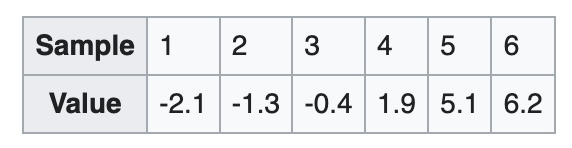

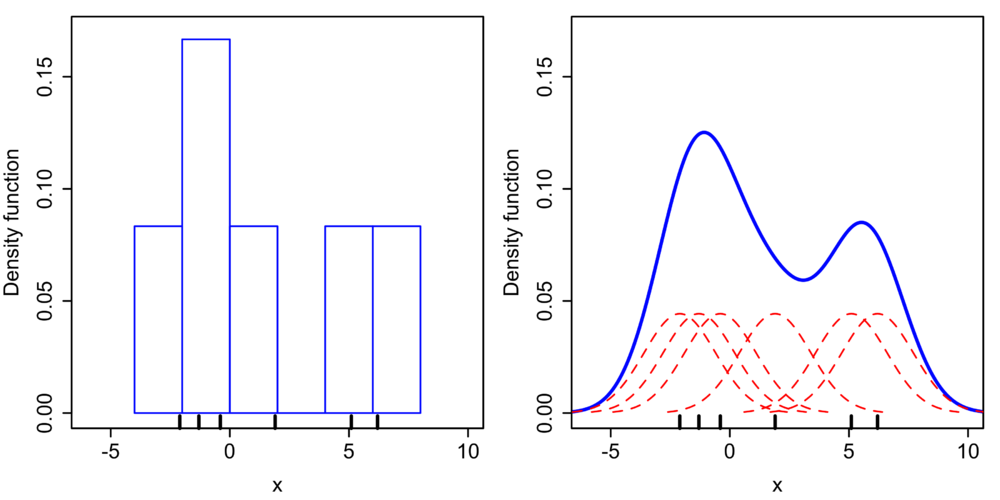

Instruction:

1. Find out how KDE plot and RUG plot help visualising data by plotting data in `PP-L6-4measurements.csv` onto a distplot
2. Modify the code so that four different measurements are plotted on the chart in different color
3. Histogram is hard to see when stacked, remove it and let's just see the kde plots
    

In [ ]:
# Type your code here


In [ ]:
# ANS
sns.displot(df3[df3['set']=='A']['value'],rug=True)

In [ ]:
sns.displot(df3[df3['set']=='B']['value'],kind='kde')

In [ ]:
sns.displot(df3[df3['set']=='C']['value'],kind='kde')

In [ ]:
sns.displot(df3[df3['set']=='D']['value'],kind='kde')

In [ ]:
sns.displot(x='value',hue='set',data=df3, kind='kde')

### 4.4 Reg Plot

One of the handiest visualization tools for making quick inferences about relationships between variables is the scatter plot.

```python
sns.regplot(x="", y="", data="")
```

Similar to distplot, Seaborn give us extra statistical power by inserting a linear regression plot on top of our scatter plot.

Instruction:
1. Plot a scatter plot with linear regression line for `PP-L5-Height_Weight`

In [ ]:
# URL for PP-L5-Height_Weight.csv: https://drive.google.com/u/1/uc?id=1imrvK_KN8JrjJSWmyZscQ4U1xfqeY-7l&export=download
df4 = pd.read_csv('https://drive.google.com/u/1/uc?id=1imrvK_KN8JrjJSWmyZscQ4U1xfqeY-7l&export=download')
# Type your code here


In [ ]:
# ANS
sns.regplot(x='Height(Inches)',y='Weight(Pounds)', data=df4,
            line_kws={'color':'red'},
            scatter_kws={'s':0.1,'color':'grey'})

### 4.5 Jointplot

Jointplot is also a variable of scatter plot.  It gives us also the individual distributions.

In [ ]:
sns.jointplot(x='Height(Inches)', y='Weight(Pounds)', data=df4)

### 4.6 Pairplot

Pairplot in seaborn create histogram or scatter plots for each pair of columns in the dataframe.  It is very useful in data science when we want to find insight between features.

**Demonstration**

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [ ]:
sns.pairplot(iris_df)

### 4.7 Heatmap

A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.

The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space

```python
sns.heatmap(a_two_dimensional_array_or_dataframe)
```

**Demonstration**

Suppose we have a model to classify an image, which can either be an apple, an orange or a banana.  To test the accuracy, we fit it with 5 photos from each class and observe the output.

We collect the output as follows.

We want to visualize the prediction with a confusion matrix on a heatmap.

In [ ]:
observations = pd.DataFrame([

    ["apple", "banana"],
    ["apple", "apple"],
    ["apple", "apple"],
    ["apple", "orange"],
    ["apple", "apple"],

    ["orange", "orange"],
    ["orange", "apple"],
    ["orange", "orange"],
    ["orange", "orange"],
    ["orange", "orange"],

    ["banana", "banana"],
    ["banana", "orange"],
    ["banana", "banana"],
    ["banana", "banana"],
    ["banana", "banana"],
], columns=["actual", "predicted"])

pivoted = observations.value_counts().unstack().fillna(0)
sns.heatmap(pivoted, annot=True)

**Exercise**
1. Aggregate the sum of sales per month
2. Rearrange the values in 2d: x = month, y = year
3. Layout the values in a Heatmap

We want a final result like this:

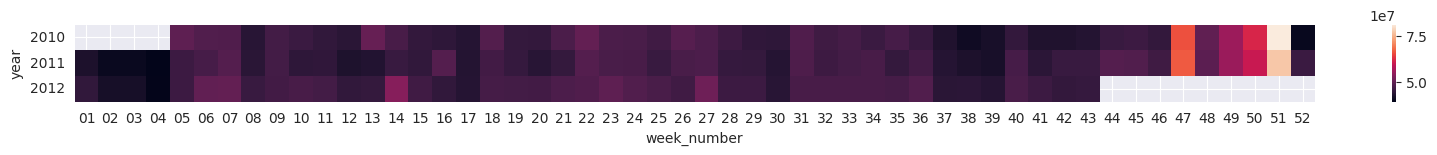

In [ ]:
# ANS Step 1: Load the data, transform the date columns to datetime

df5 = pd.read_csv("https://drive.google.com/u/1/uc?id=1kbCDXONvf8Bn4kEW1ssmxdJLDHC-oV-E&export=download")
df5['Date_dt'] = pd.to_datetime(df5['Date'], format="%d/%m/%Y")
df5

In [ ]:
# ANS Step 2: Group by the week

week_vs_sales = df5.groupby('Date_dt')['Weekly_Sales'].sum().reset_index()
week_vs_sales

In [ ]:
# ANS Step 3: Extract the week_number

week_vs_sales['week_number'] = week_vs_sales['Date_dt'].apply(lambda v: v.strftime("%U")) # Week number
week_vs_sales['year'] = week_vs_sales['Date_dt'].apply(lambda v: v.strftime("%Y")) # Year
week_vs_sales

In [ ]:
# ANS Step 4: Create a pivot table, ready to send to heatmap

pivoted = week_vs_sales.pivot(index="year", columns="week_number", values="Weekly_Sales")
pivoted

In [ ]:
# ANS Step 5: Plot it on a heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 1))
sns.heatmap(pivoted)